# 3.2.1 Κατανομές Βαθμών Δικτύων Συνεμφανιζομένων Hashtags

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy import stats
import numpy as np
import math


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import pickle
import glob
# fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_hashtag_networks'
fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_hashtag_networks'
os.chdir(fildir)
GG= pickle.load( open( "GGh.p", "rb" ) )

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut hashtag network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1


The number 1 cut hashtag network has 9139 nodes and 35329 edges
The number 2 cut hashtag network has 3082 nodes and 19030 edges
The number 3 cut hashtag network has 1892 nodes and 14477 edges
The number 4 cut hashtag network has 1397 nodes and 12032 edges
The number 5 cut hashtag network has 1084 nodes and 10493 edges
The number 6 cut hashtag network has 889 nodes and 9290 edges
The number 7 cut hashtag network has 761 nodes and 8356 edges
The number 8 cut hashtag network has 676 nodes and 7646 edges
The number 9 cut hashtag network has 607 nodes and 7108 edges
The number 10 cut hashtag network has 552 nodes and 6693 edges
The number 11 cut hashtag network has 506 nodes and 6249 edges
The number 12 cut hashtag network has 453 nodes and 5879 edges
The number 13 cut hashtag network has 416 nodes and 5551 edges
The number 14 cut hashtag network has 388 nodes and 5264 edges
The number 15 cut hashtag network has 363 nodes and 5002 edges
The number 16 cut hashtag network has 342 nodes and 47

In [5]:
ddg=[]
# for i in range(len(GG)-1):
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


In [6]:
lscc=[]
lsccl=[]
for k,G in GG.items():
    
    degree_sequence=sorted([d for n,d in G.degree().items()], reverse=True) # degree sequence
    degree_sequence_l=sorted([math.log(d) for n,d in G.degree().items()], reverse=True)
    degreeCount=collections.Counter(degree_sequence)
    degreeCount_l=collections.Counter(degree_sequence_l)
    deg, cnt = zip(*degreeCount.items())
    deg_l, cnt_l = zip(*degreeCount_l.items())
    

    slope, intercept, r_value, p_value, std_err = stats.linregress(cnt,deg)

    
    lscc.append(slope)
    slope, intercept, r_value, p_value, std_err = stats.linregress(cnt_l,deg_l)

    lsccl.append(slope)
    
print lscc,len(lscc)
print lsccl,len(lsccl)
nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

[-0.16158059816411841, -0.60544154646537884, -1.1317678932372204, -1.6445362018112173, -2.2278174686305823, -2.7813231457167538, -3.4750998018585801, -3.5691137558959523, -4.1117030065898446, -4.3952879581151834, -4.6208160374676268, -5.4325863276984885, -5.1802447780071823, 0.125, -6.4107099008342479, -7.3657939442390381, -7.738692644590885, -7.8562834546945117, -8.2868086892643475, -8.5534115774816009, -9.3143940890592329, -9.3721707818929971, -10.025940230640696, -10.806332318721019, -9.4956235581490027, -12.287978863936585, -15.093083539531053, -12.499727876347018, -12.066527099325413, -13.511872478338505, -13.216938760961007, -12.26261115920359, -10.647119875454075, -10.407587887225894, -10.193887676126224, -9.9737652880216601, -8.6305670215077157, -10.798708126783842, -9.1839332748024542, -8.4218224178099934, -8.3973051252990789, -8.2071633595407416, -8.3227911646586392, -10.124233128834359, -9.9807186678352355, -10.83967935871744, -11.631677852348993, -9.6179310344827567, -9.308

In [7]:
ddd=zip(nGG,lscc,lsccl)
print ddd

[('G_1', -0.16158059816411841, -0.0027830383931119699), ('G_2', -0.60544154646537884, -0.012719680877834032), ('G_3', -1.1317678932372204, -0.025490034804750494), ('G_4', -1.6445362018112173, -0.037648883107048413), ('G_5', -2.2278174686305823, -0.051023527353735471), ('G_6', -2.7813231457167538, -0.063313528792904875), ('G_7', -3.4750998018585801, -0.078742990492122869), ('G_8', -3.5691137558959523, -0.088633318161945543), ('G_9', -4.1117030065898446, -0.099375310539932399), ('G_10', -4.3952879581151834, -0.10906375252848824), ('G_11', -4.6208160374676268, -0.11767067245334036), ('G_12', -5.4325863276984885, -0.1349096507927062), ('G_13', -5.1802447780071823, -0.13372663869238346), ('G_526', 0.125, 0.011913772475540596), ('G_15', -6.4107099008342479, -0.16090439050812488), ('G_16', -7.3657939442390381, -0.18575053804153227), ('G_17', -7.738692644590885, -0.19629778149668192), ('G_18', -7.8562834546945117, -0.20144565235455289), ('G_19', -8.2868086892643475, -0.20895739311930164), ('G_

##### The first bin of degrees (0,55) has number of nodes 9136 and the last one (7205,7260) has 1 node.
##### We have 131 bins with 56 degress each one.

(0, 65)

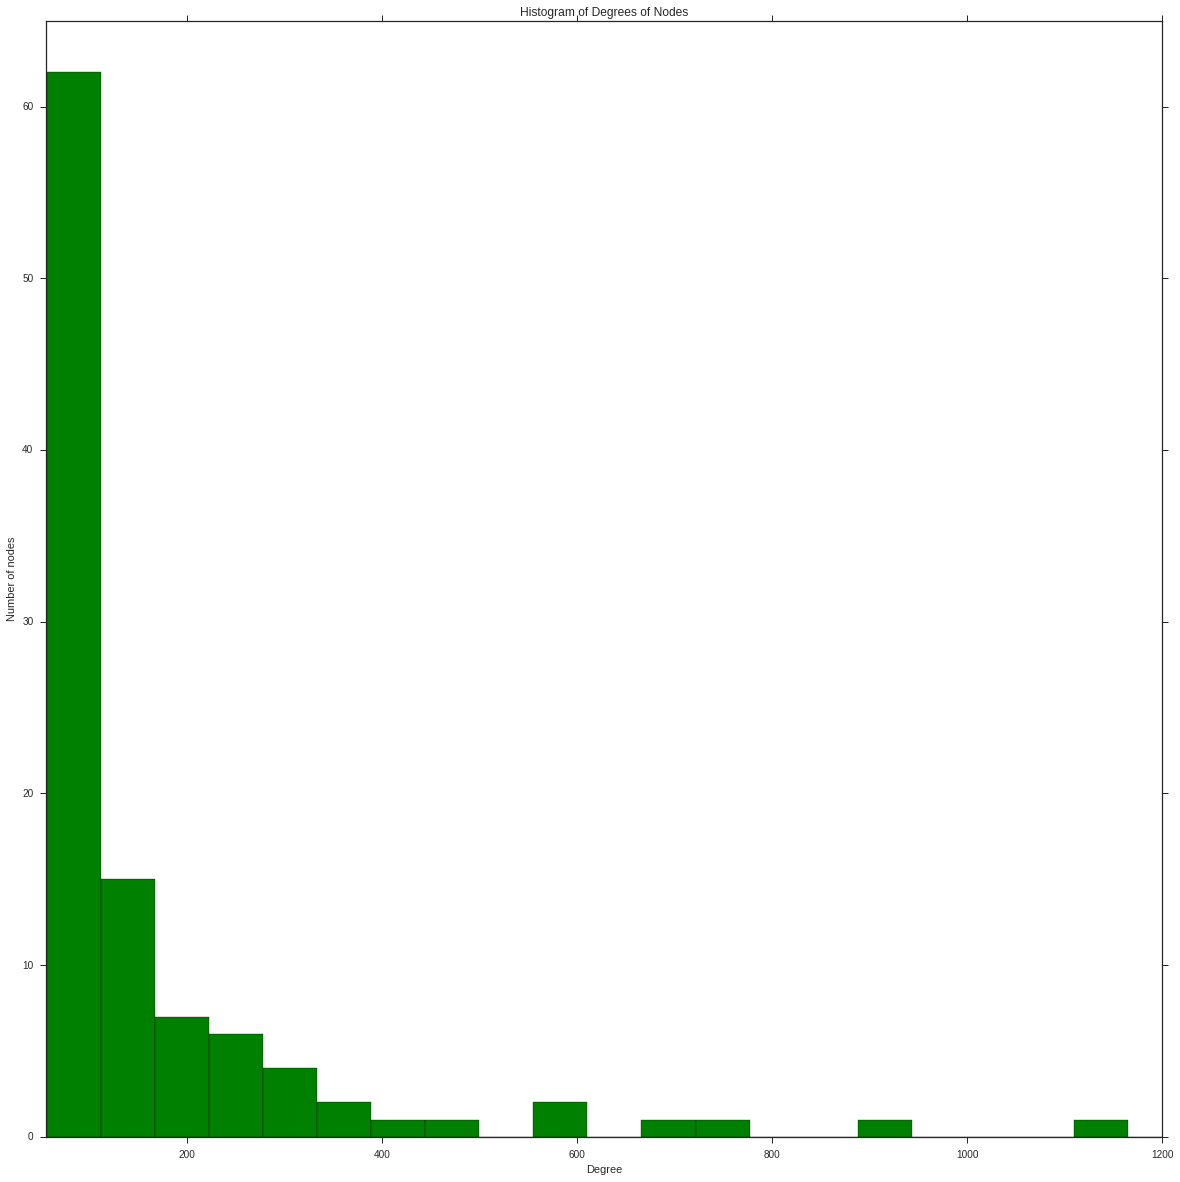

In [8]:
from pylab import hist

G=GG[1] 
deg = G.degree()

# pla=[0.47,0.47,0.47,0.47]
# a=0.3

plt.figure(figsize=(20,20))
plt.xlabel("Degree")


hist(deg.values(),bins=len(set(G.degree().values())),color='g')

# plt.hist(deg.values(), bins=range(0,2)

# histtype='step', histtype='stepfilled'
#plt.gca().set_xscale("log")
plt.ylabel("Number of nodes")
plt.title('Histogram of Degrees of Nodes')
# hist(deg.values(),bins=len(set(G.degree().values())),normed=True,color='g')
# plt.ylabel("Percentage of nodes")
# plt.title('Histogram of Degrees of Nodes (Percentages)')
plt.xlim(56,1200)
plt.ylim(0,65)
# plt.axes(pla)
# plt.axis('off')
# len(deg.values())
# nx.draw_networkx_nodes(G,pos=pos,node_size=400,node_color='g',alpha=a)
# nx.draw_networkx_edges(G,pos=pos,alpha=a)


In [9]:
ds=list(sorted([d for n,d in G.degree().items()], reverse=True)) # degree sequence
c=0
for i in ds:
    if i>2000: #55
        c=c+1
print c
print max(ds)
print len(set(G.degree().values()))
7260-55

1
7260
131


7205

In [10]:
ds=list(sorted([d for n,d in G.degree().items()], reverse=True)) # degree sequence
c=0
for i in ds:
    if i>7205: #55
        c=c+1
print c

1


In [11]:
ds=list(sorted([d for n,d in G.degree().items()], reverse=True)) # degree sequence
c=0
for i in ds:
    if i<=55: #55
        c=c+1
print c

9032


(0, 0.00015)

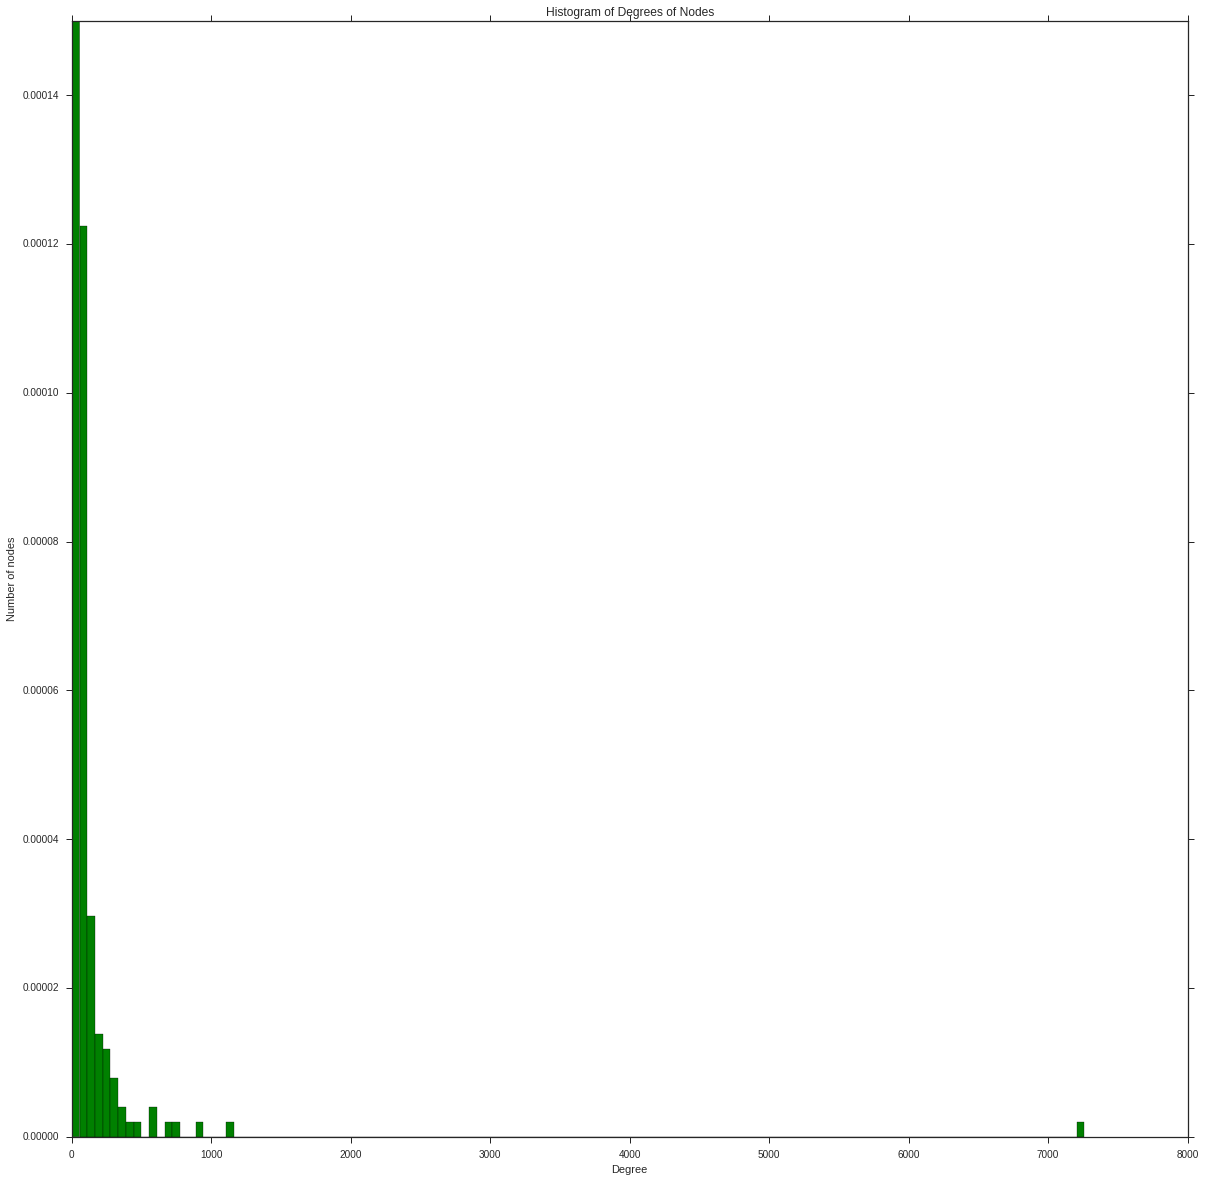

In [12]:
from pylab import hist

G=GG[1] 
deg = G.degree()



plt.figure(figsize=(20,20))
plt.xlabel("Degree")

hist(deg.values(),bins=len(set(G.degree().values())),color='g' ,normed=True)


plt.ylabel("Number of nodes")
plt.title('Histogram of Degrees of Nodes')

plt.ylim(0,0.00015)


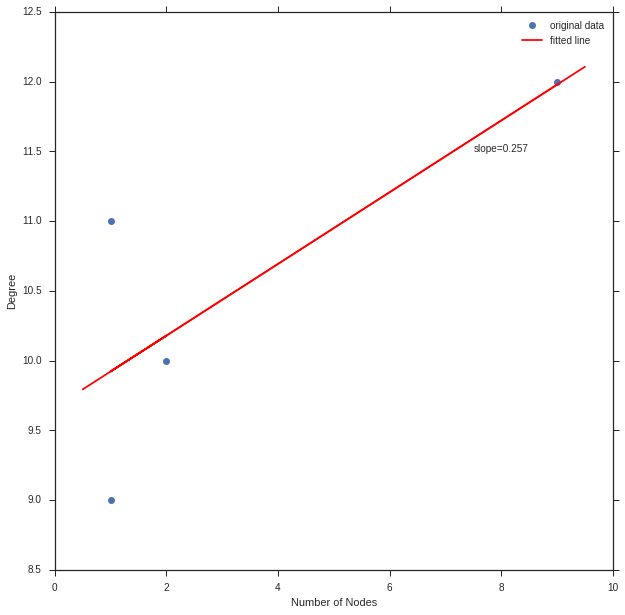

0.256983240223 9.66480446927
[(0, 9), (1, 10), (2, 11), (3, 12)]
13 74


In [14]:
from operator import itemgetter

from scipy import stats
import numpy as np
import pylab
G=GG[491]
degree_sequence=sorted([d for n,d in G.degree().items()], reverse=True) # degree sequence
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())   
x=np.array(cnt)
y=np.array(deg)
slope, intercept, r_value, p_value, std_err = stats.linregress(cnt,deg)

x1=0.5
x2=9.5

plt.figure(figsize=(10,10))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
# plt.plot(x1, intercept + slope*x1,  'ro') #, label='fitted line')
# plt.plot(x2, intercept + slope*x2,  'ro') #, label='fitted line')
y1=intercept + slope*x1
y2=intercept + slope*x2
plt.plot((x1,x2),(y1,y2),  'r') #, label='fitted line')

plt.text(7.5,11.5, 'slope=0.257')

plt.xlabel('Number of Nodes')
plt.ylabel('Degree')
plt.xlim(0,10)
plt.ylim(8.5,12.5)
plt.legend()
plt.show()
print slope, intercept
print list(enumerate(degreeCount))
print len(nx.nodes(G)),len(nx.edges(G))

[12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 10, 10, 9]

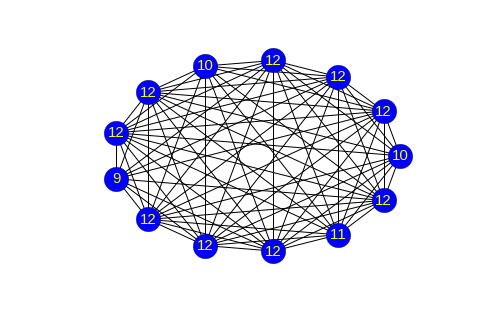

In [15]:
pos=nx.circular_layout(G)
labeldict = nx.degree(G)
nx.draw(G, pos=pos,labels=labeldict, with_labels = True, node_size=600, node_color='blue', font_color= 'yellow',font_size = 15)#, alpha= 0.5)
degree_sequence

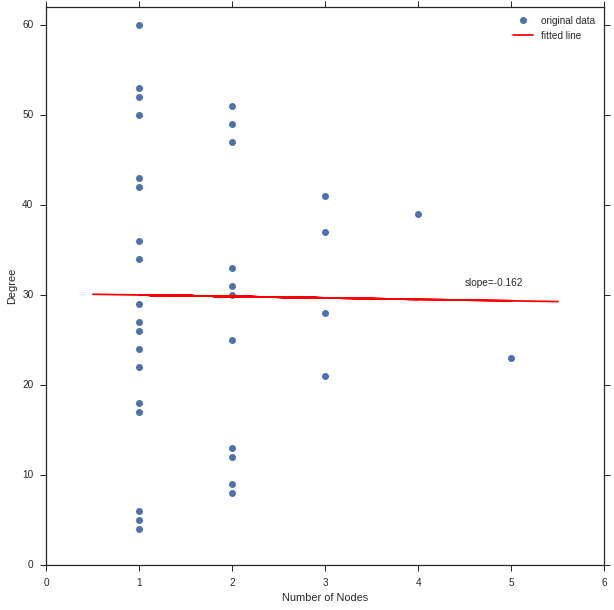

-0.161713286713 30.138986014
[(0, 4), (1, 5), (2, 6), (3, 8), (4, 9), (5, 12), (6, 13), (7, 17), (8, 18), (9, 21), (10, 22), (11, 23), (12, 24), (13, 25), (14, 26), (15, 27), (16, 28), (17, 29), (18, 30), (19, 31), (20, 33), (21, 34), (22, 36), (23, 37), (24, 39), (25, 41), (26, 42), (27, 43), (28, 47), (29, 49), (30, 50), (31, 51), (32, 52), (33, 53), (34, 60)]
61 908


In [16]:
from operator import itemgetter

from scipy import stats
import numpy as np
import pylab
G=GG[80]
degree_sequence=sorted([d for n,d in G.degree().items()], reverse=True) # degree sequence
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())   
x=np.array(cnt)
y=np.array(deg)
slope, intercept, r_value, p_value, std_err = stats.linregress(cnt,deg)

x1=0.5
x2=5.5

plt.figure(figsize=(10,10))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

y1=intercept + slope*x1
y2=intercept + slope*x2
plt.plot((x1,x2),(y1,y2),  'r') #, label='fitted line')

plt.text(4.5,31, 'slope=-0.162')

plt.xlabel('Number of Nodes')
plt.ylabel('Degree')
plt.xlim(0,6)
plt.ylim(0,62)
plt.legend()
plt.show()
print slope, intercept
print list(enumerate(degreeCount))
print len(nx.nodes(G)),len(nx.edges(G))

In [20]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['Cut Hashtag Graph', 'Slope','Logarithmic Slope']
cdf

,Cut Hashtag Graph,Slope,Logarithmic Slope
0,G_1,-0.161581,-0.002783
1,G_2,-0.605442,-0.012720
2,G_3,-1.131768,-0.025490
3,G_4,-1.644536,-0.037649
4,G_5,-2.227817,-0.051024
5,G_6,-2.781323,-0.063314
6,G_7,-3.475100,-0.078743
7,G_8,-3.569114,-0.088633
8,G_9,-4.111703,-0.099375
9,G_10,-4.395288,-0.109064


In [21]:
# lww=sorted(lww)
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf=cdf.dropna()
cdf


,Cut Hashtag Graph,Slope,Logarithmic Slope,cut-off values
0,G_1,-0.161581,-0.002783,1
1,G_2,-0.605442,-0.012720,2
2,G_3,-1.131768,-0.025490,3
3,G_4,-1.644536,-0.037649,4
4,G_5,-2.227817,-0.051024,5
5,G_6,-2.781323,-0.063314,6
6,G_7,-3.475100,-0.078743,7
7,G_8,-3.569114,-0.088633,8
8,G_9,-4.111703,-0.099375,9
9,G_10,-4.395288,-0.109064,10


<function matplotlib.pyplot.show>

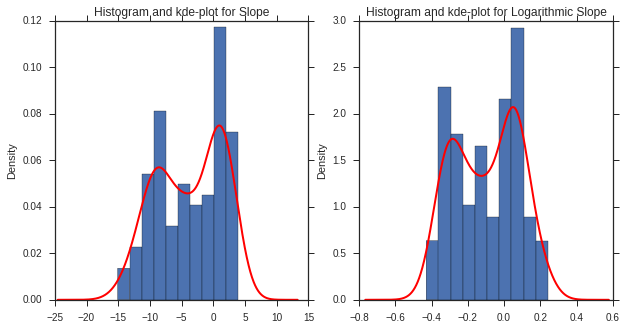

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Histogram and kde-plot for Slope")
cdf['Slope'].plot(kind="hist", normed=1)
cdf['Slope'].plot(kind="kde", color="r", linewidth=2)
plt.subplot(122)
plt.title("Histogram and kde-plot for Logarithmic Slope")
cdf['Logarithmic Slope'].plot(kind="hist", normed=1)
cdf['Logarithmic Slope'].plot(kind="kde", color="r", linewidth=2)
plt.show

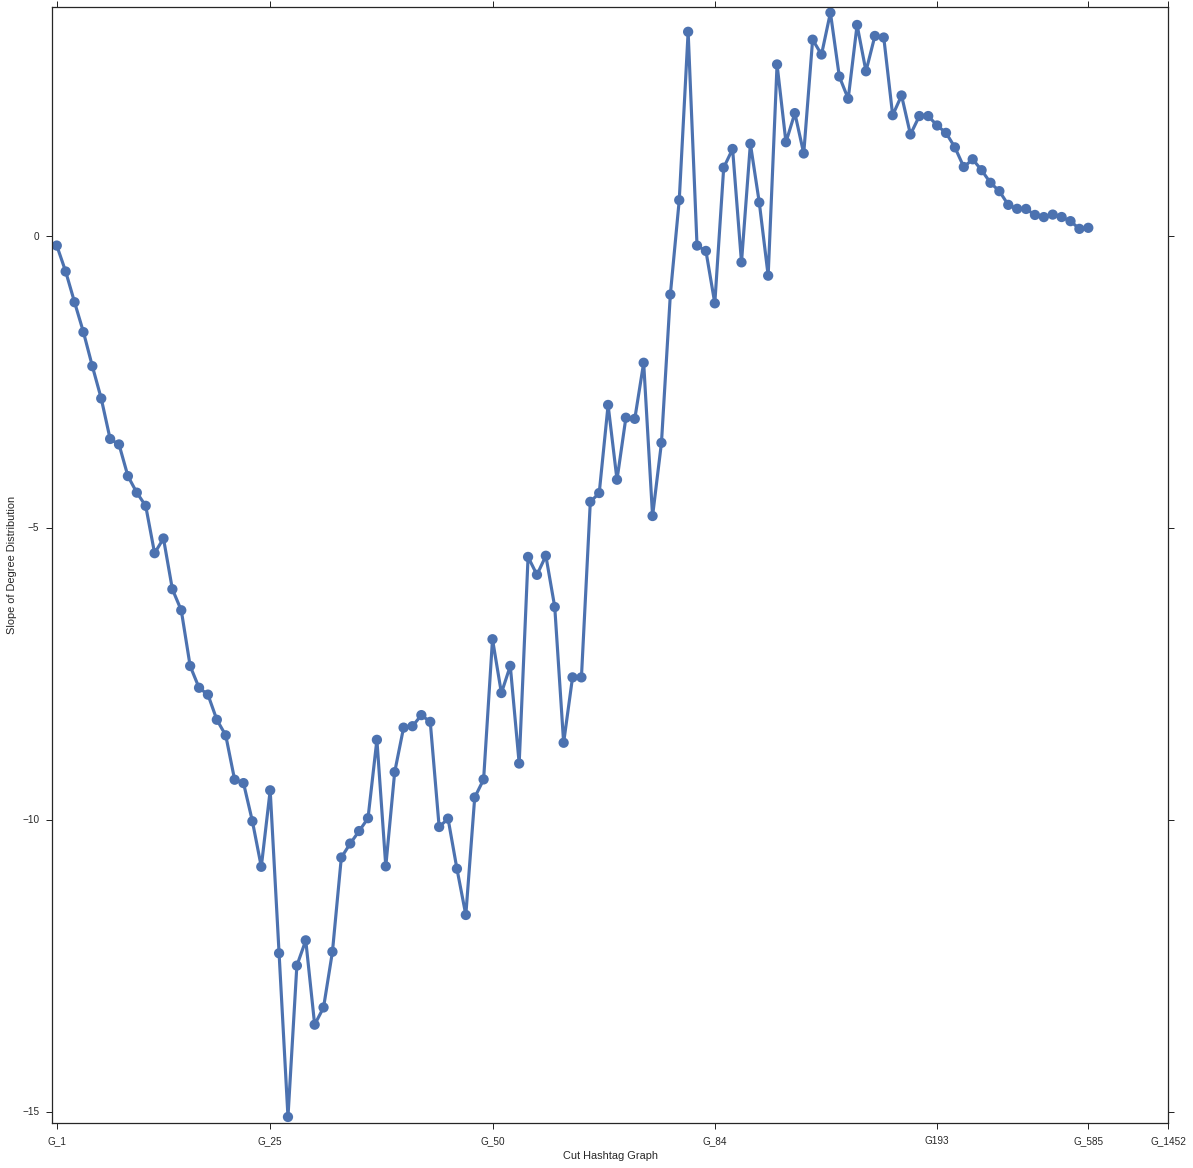

In [23]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Slope"]

plt.figure(figsize=(20,20))


ax1=sns.pointplot(x, y)

a1=ax1.set(xlabel='Cut Hashtag Graph',ylabel='Slope of Degree Distribution')
a2=ax1.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax1.set(ylim=(min(lscc)-0.1,max(lscc)+0.1))


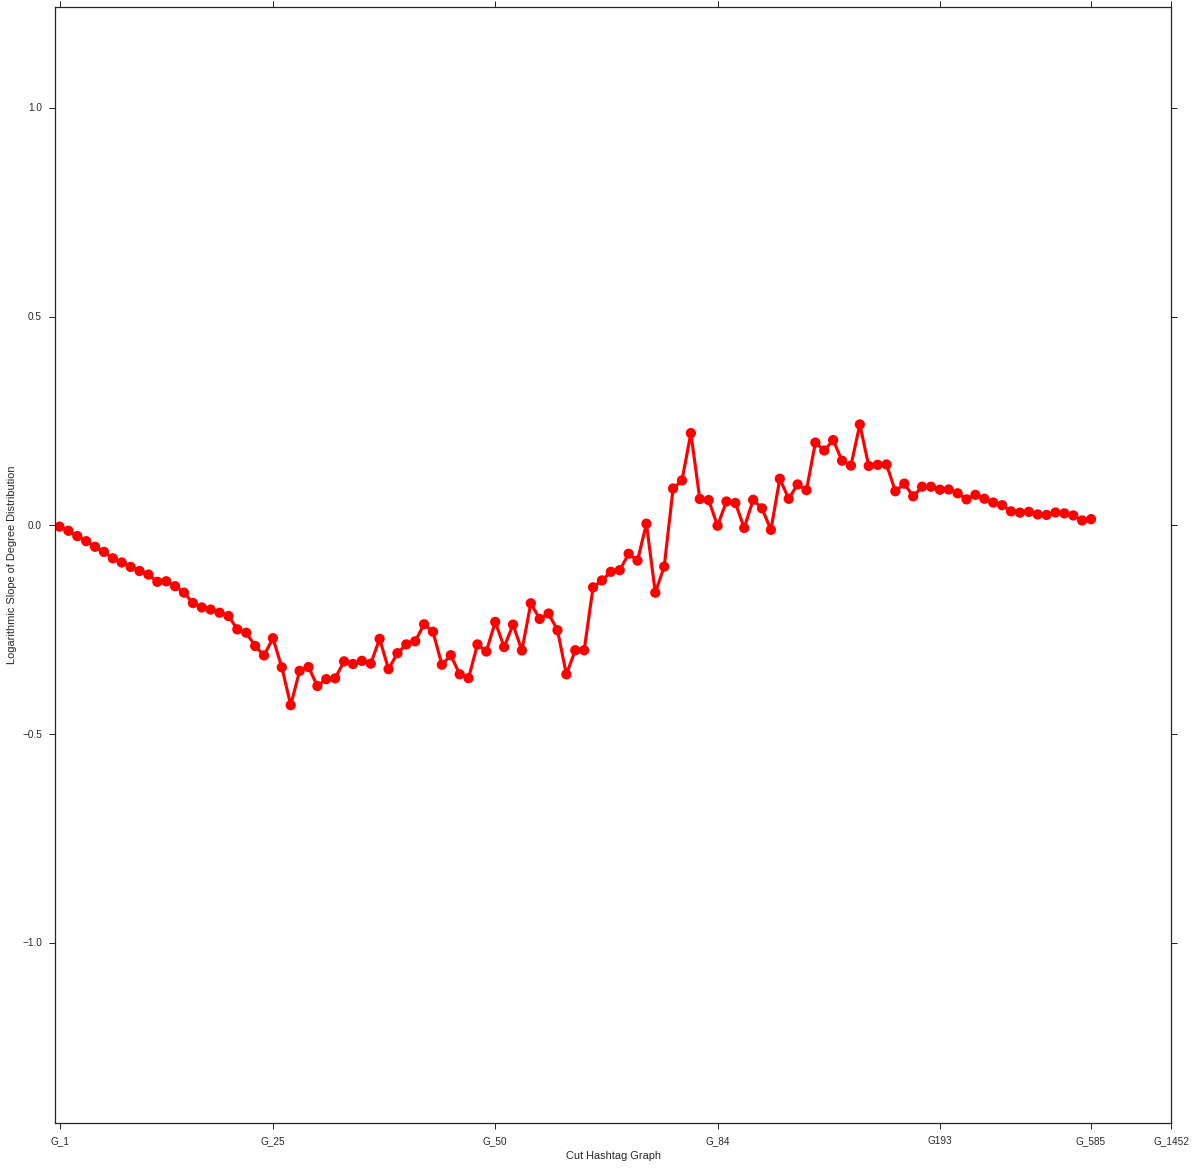

In [24]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Logarithmic Slope"]

plt.figure(figsize=(20,20))


ax1=sns.pointplot(x, y,color='r')
a1=ax1.set(xlabel='Cut Hashtag Graph',ylabel='Logarithmic Slope of Degree Distribution')
a2=ax1.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax1.set(ylim=(min(lsccl)-1,max(lsccl)+1))


Slope                1.000000
Logarithmic Slope    0.983460
cut-off values       0.550101
Name: Slope, dtype: float64


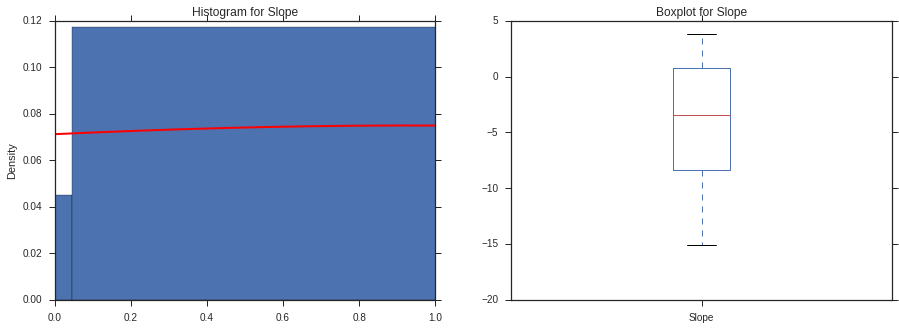

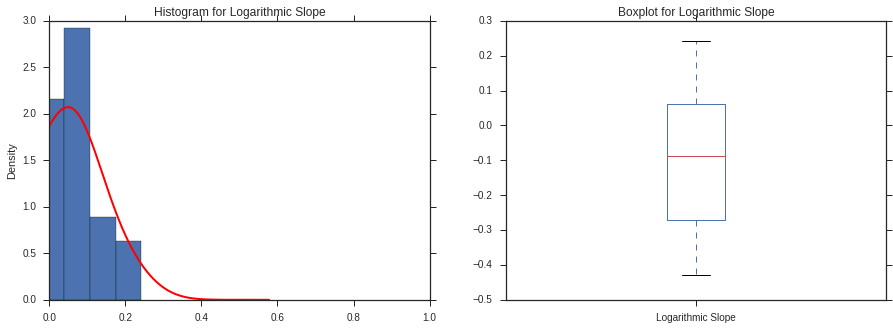

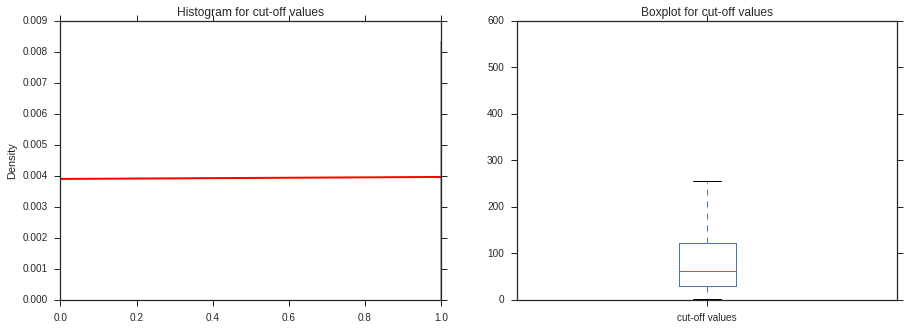

In [40]:
cdf_corr = cdf.corr()
goal_corr = cdf_corr["Slope"]#.abs()
top_corr = goal_corr.sort_values(ascending=False)#[:10]
print top_corr
inds = top_corr.index
for var in inds:
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.xlim(0, 1)
    plt.title("Histogram for {0}".format(var))
    cdf[var].plot(kind="hist", normed=1)
    cdf[var].plot(kind="kde", color="r", linewidth=2)
    plt.subplot(122)
    plt.title("Boxplot for {0}".format(var))
    cdf[var].plot(kind="box")
    plt.show()

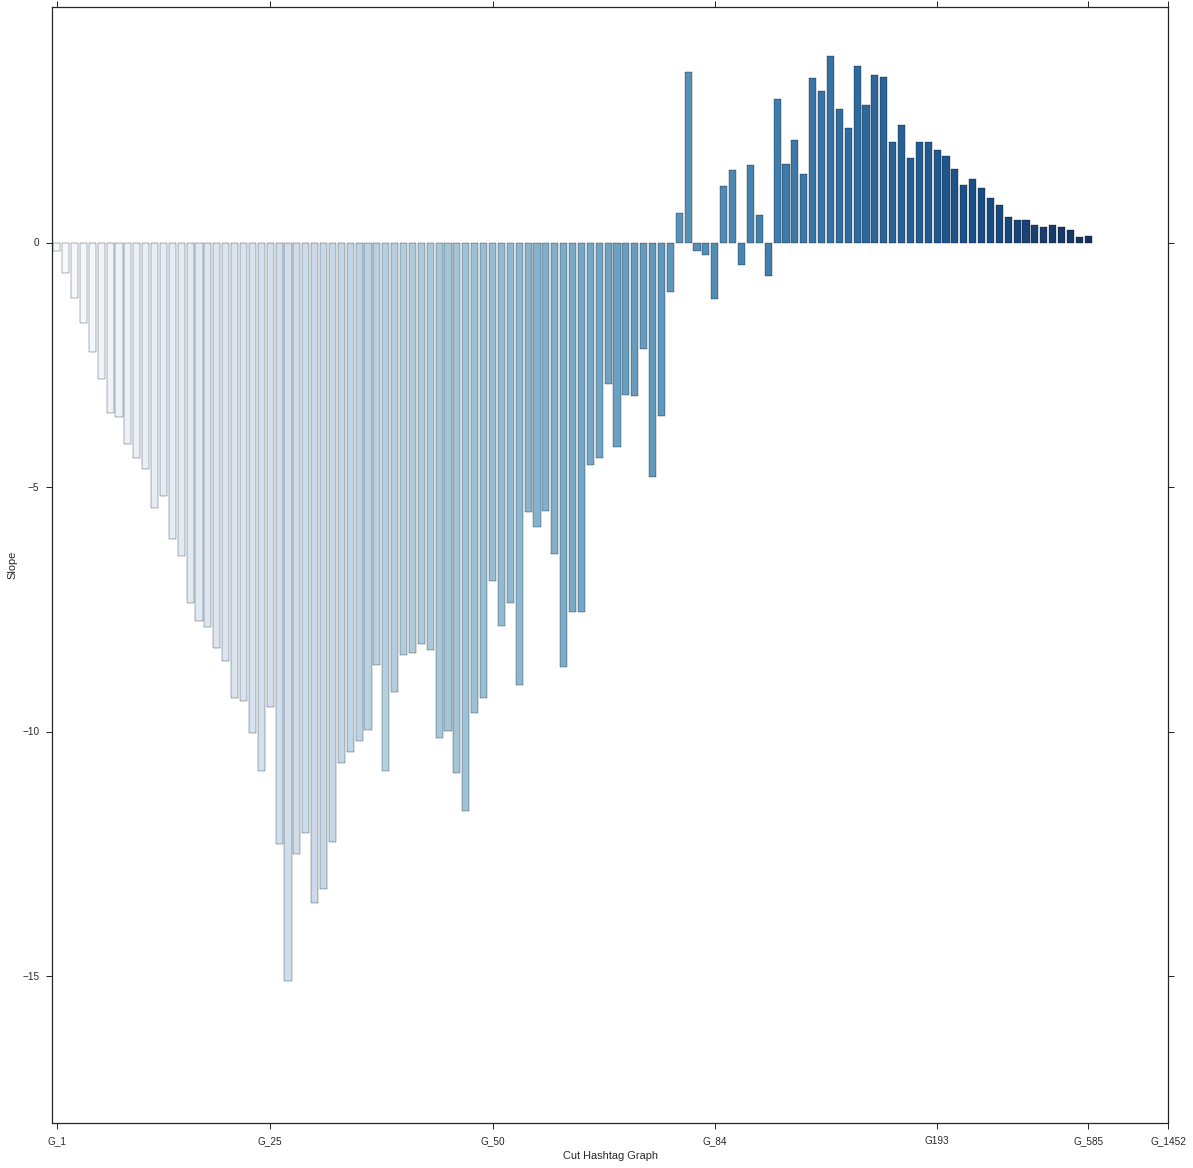

In [25]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Slope"]
plt.figure(figsize=(20,20))

G_42","G_62" , 'G_1452'],
ax=sns.barplot(x, y,palette='Blues')
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Slope')
a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(-18,max(lscc)+1))


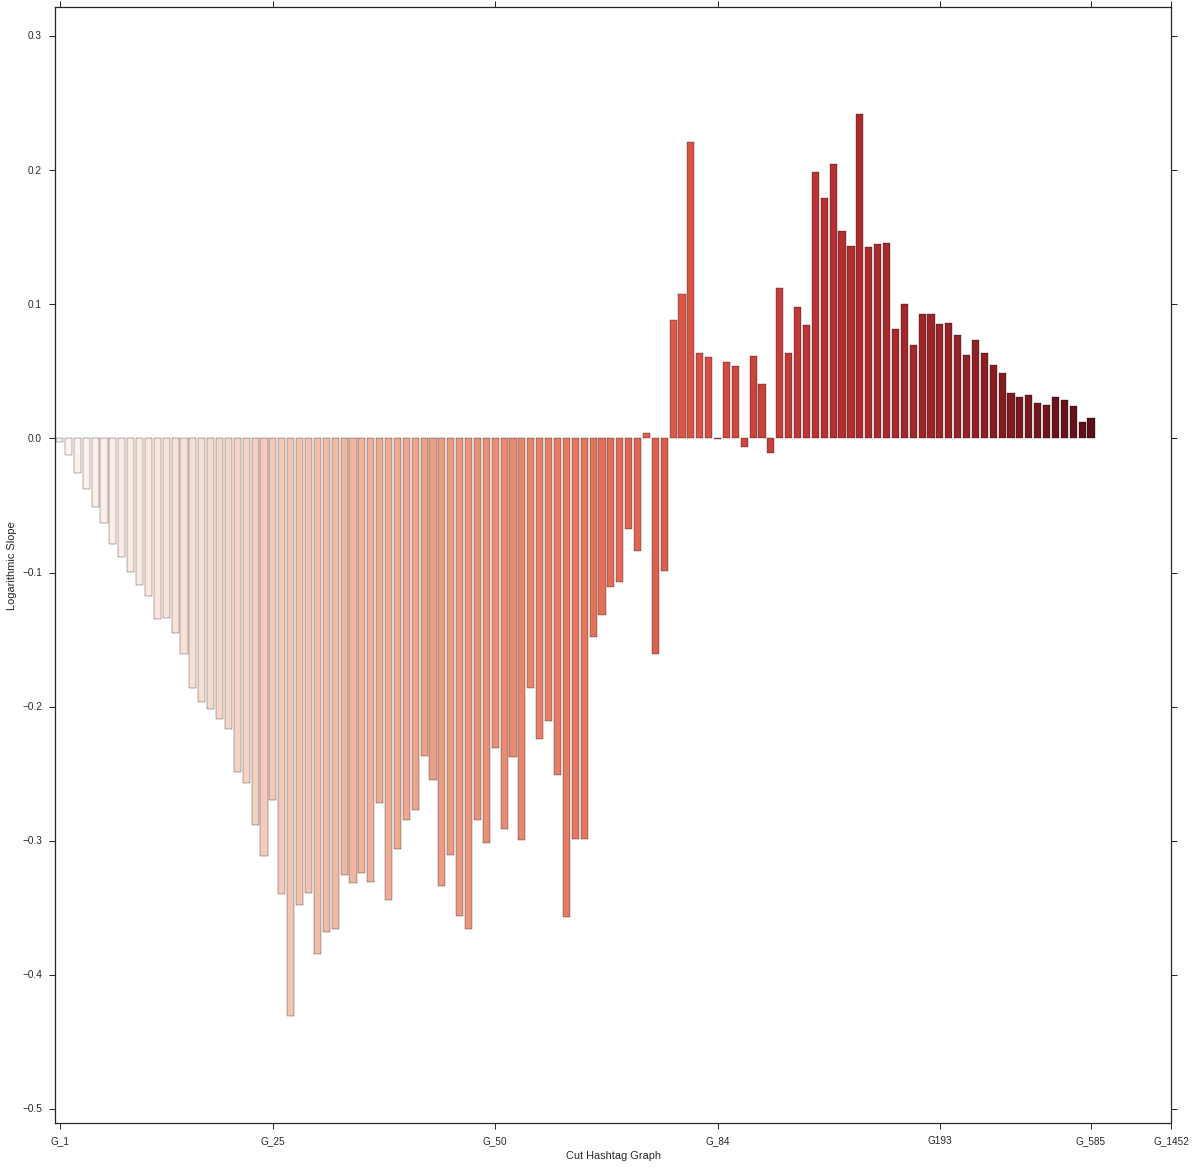

In [26]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Logarithmic Slope"]
plt.figure(figsize=(20,20))

ax=sns.barplot(x, y,palette="Reds")
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Logarithmic Slope')
a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(min(lsccl)-0.08,max(lsccl)+0.08))
